In [114]:
# Train the Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

#Створюємо екземпляр моделі рішення-дерева з параметром max_depth=2, що обмежує глибину дерева до двох рівнів.
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

#У цьому коді ми використовуємо бібліотеку scikit-learn для навчання моделі класифікатора на основі дерева рішень.
#Спочатку ми завантажуємо набір даних "Iris" з бібліотеки sklearn.datasets.
#Потім ми витягуємо лише дві ознаки (довжину та ширину пелюстки) і відповідний цільовий вектор. 
#Далі ми створюємо екземпляр моделі DecisionTreeClassifier з обмеженням глибини до двох рівнів за допомогою параметра max_depth=2. 
#Нарешті, ми навчаємо модель на наших даних за допомогою методу fit(), передаючи матрицю ознак X та вектор міток y.


DecisionTreeClassifier(max_depth=2)

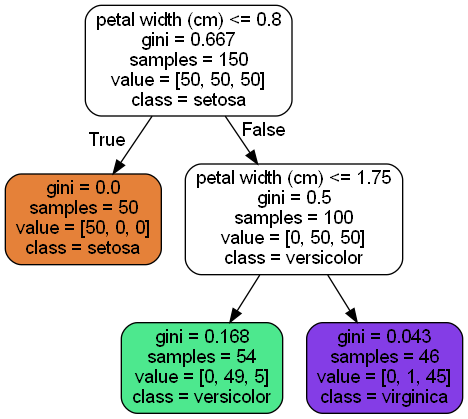

In [96]:
# Visualizing the Tree
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

(graph,) = pydot.graph_from_dot_file(filename_dot)
graph.write_png(filename_png)

Image(filename_png)

#У цьому коді ми використовуємо бібліотеку scikit-learn для візуалізації моделі дерева рішень, яку ми навчили на даних "Iris".
#Спочатку ми викликаємо функцію export_graphviz() для експорту графічного представлення нашого дерева рішень у форматі DOT, 
#вказуючи параметри моделі, назви ознак, назви класів та додаткові характеристики для оформлення.
#Потім ми використовуємо бібліотеку pydot для зчитування файлу DOT і створення візуалізації у форматі PNG.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
#Цей код визначає функцію plot_decision_boundary, яка призначена для візуалізації границь прийняття рішення класифікатора
#на графіку. Вона приймає в якості аргументів класифікатор (clf), дані (X і y), а також інші параметри, які контролюють вигляд
#графіку, такі як область графіку (axes), включення легенди (legend), відображення тренувальних даних (plot_training) і т. д.

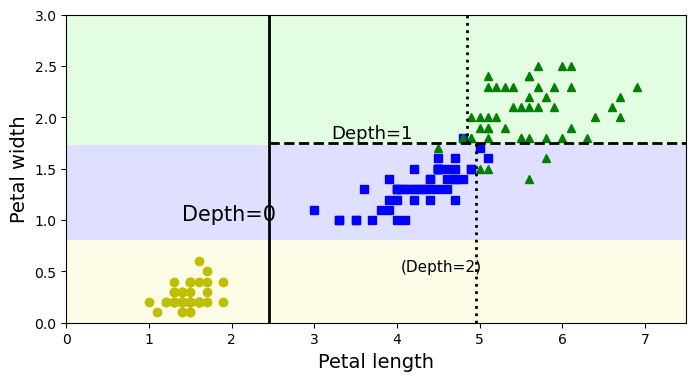

In [98]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()
#Цей код створює графік рішення рішення дерева класифікації для даних про іриси, використовуючи функцію plot_decision_boundary

# Estimating Class Probabilities

In [99]:
tree_clf.predict_proba([[5, 1.5]])
#Метод tree_clf.predict_proba([[5, 1.5]]) використовується для оцінки ймовірностей належності до класів
#для нових спостережень. У даному випадку, модель tree_clf оцінює ймовірності того, що нове спостереження з має клас 0,
#1 або 2, де [5, 1.5] представляє вектор ознак нового спостереження. Результатом буде матриця, в якій кожен рядок відповідає
# одному спостереженню, а кожний стовпчик відповідає ймовірності належності до відповідного класу.

array([[0.        , 0.90740741, 0.09259259]])

In [100]:
tree_clf.predict([[5, 1.5]])
#Цей код викликає метод predict моделі tree_clf для передбачення класу для нових даних. У випадку, 
#якщо tree_clf.predict([[5, 1.5]]) повертає array([1]), це означає, що модель передбачає, що вхідні дані [[5, 1.5]]
#належать до класу з індексом 1.

array([1])

# Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
tree_reg.fit(X, y)
#У цьому коді ми використовуємо клас DecisionTreeRegressor з бібліотеки Scikit-Learn для побудови моделі регресії
#на основі дерева рішень. Параметри max_depth та min_samples_leaf встановлюють максимальну глибину дерева та мінімальну
#кількість вибірок, яка має бути в кожному листку дерева, відповідно. Потім ця модель навчається на вхідних даних X та y.

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [102]:
#Visualizing 
from IPython.display import Image
def visualize_tree(tree, filename_dot, filename_png):
    export_graphviz(
        tree,
        out_file=filename_dot,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
    (graph,) = pydot.graph_from_dot_file(filename_dot)
    graph.write_png(filename_png)
    

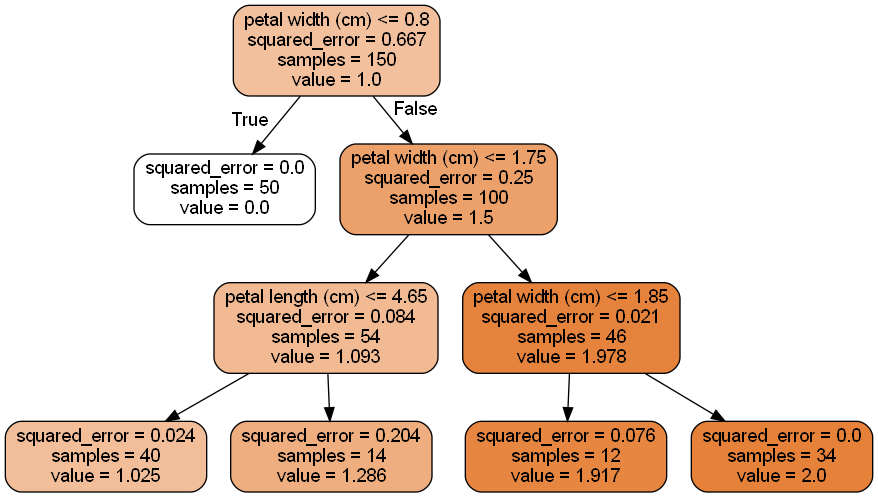

In [103]:
visualize_tree(tree_reg, "tree_reg.dot", "tree_reg.png")
Image("tree_reg.png")

# Exercises

## Яка приблизна глибина Рішення Дерева, навченого (без обмежень) на навчальному наборі з одним мільйоном екземплярів?

Глибина навченого дерева рішень, яке не має обмежень, дорівнює log2(m), де m - кількість листків. У випадку одного мільйона екземплярів, log2(1 000 000) дорівнює приблизно 20. Таким чином, дерево буде мати глибину приблизно 20, за умови, що воно навчено без обмежень. Однак, через неідеальне збалансування дерева глибина може бути трохи більшою.

## Чи загальна нерівність Джині вузла зазвичай нижча або вища, ніж у його батька? Чи вона загалом нижча/вища або завжди нижча/вища?

Загалом, нерівність Джині вузла зазвичай нижча, ніж у його батька.

## Якщо Дерево рішень погано підходить під навчальний набір, чи рекомендується спробувати масштабувати вхідні ознаки?

Ні, масштабування вхідних ознак не впливатиме на дерево рішень, оскільки воно не залежить від масштабування ознак.

## Train and fine-tune a Decision Tree for the moons dataset by following these steps:

In [104]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
#Ми генеруємо набір даних "місяців" за допомогою функції make_moons з бібліотеки sklearn.datasets.
#Цей набір даних містить 10 000 зразків з двома ознаками та відповідними мітками.

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Ми розділяємо набір даних на тренувальний і тестовий за допомогою функції train_test_split з бібліотеки sklearn.model_selection.
#Таким чином, отримуємо окремі набори даних для тренування моделі (80% від усіх даних) та для оцінки її продуктивності
#(20% від усіх даних).

c) Use grid search with cross-validation (with the help of the ```GridSearchCV``` class) to find good hyperparameter values for a ```DecisionTreeClassifier```. Hint: try various values for ```max_leaf_nodes```.

In [106]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)
#Ми використовуємо GridSearchCV для пошуку найкращих гіперпараметрів для моделі рішення дерева.
#В цьому випадку ми оцінюємо параметри max_leaf_nodes (максимальна кількість листків) і min_samples_split
#(мінімальна кількість зразків, яка потрібна для розбиття вузла). Це допомагає знайти оптимальні значення цих параметрів,
#щоб покращити продуктивність моделі на тренувальних даних.

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [107]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [108]:
# By default, GridSearchCV trains the best model found on the whole training set, 
# so we don't need to do it again. We can simply evaluate the model's accuracy:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)
#Цей код оцінює точність моделі, що була знайдена найкращою під час пошуку по сітці (GridSearchCV).
#Модель, яка виявилася найкращою, вже була навчена на всьому навчальному наборі даних за замовчуванням у GridSearchCV,
#тому нам не потрібно повторно навчати її. Ми просто оцінюємо її точність на тестовому наборі даних, 
#використовуючи функцію accuracy_score.
#Отримана точність моделі становить приблизно 86.95%, що означає, що модель правильно класифікувала близько 87% тестових зразків.

0.8695